## Make a 1" cube with gyroid structure

In [9]:
from spartantpms.tpms import gyroid_function
from sdf import box
import numpy as np
import matplotlib.pyplot as plt

Make the signed distance function representation of the structure

In [3]:
# inputs
xmax, ymax, zmax = 25.4, 25.4, 25.4 #mm
nx, ny, nz = 2, 2, 2 #tpms periods in each dimension
pore_fraction = 0.3
step_size = 0.15

# generate structure
infill = gyroid_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= pore_fraction
)
cube = box((xmax, ymax, zmax))

f = cube & infill #boolean intersection powered by sdf

Plot (note this is very slow in matplotlib -- keep `mesh_ct` low to avoid long rendering times)

In [10]:
from spartantpms.tpms.utils import to_voxels

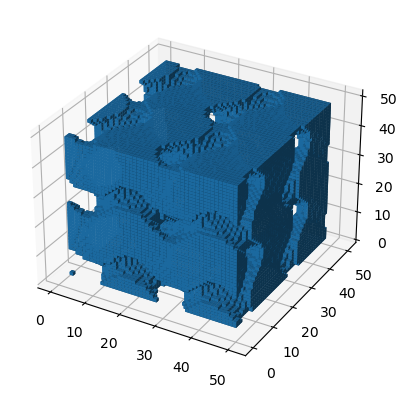

In [5]:
voxels = to_voxels(f, mesh_ct=51) #note: rendering gets very slow with higher `mesh_ct`. Default 51

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.voxels(voxels)
plt.show()

Change the periodicity in each dimension

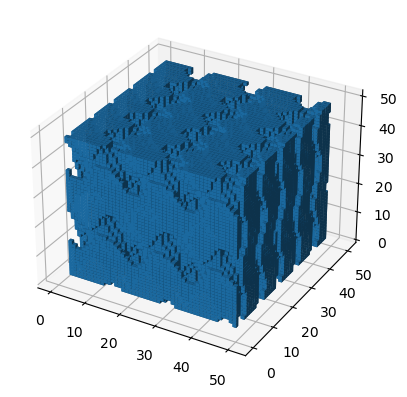

In [7]:
# inputs
xmax, ymax, zmax = 25.4, 25.4, 25.4 #mm
nx, ny, nz = 3, 5, 2 #tpms periods in each dimension
pore_fraction = 0.3
step_size = 0.15

# generate structure
infill = gyroid_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= pore_fraction
)
cube = box((xmax, ymax, zmax))

f = cube & infill #boolean intersection powered by sdf

voxels = to_voxels(f, mesh_ct=51) #note: rendering gets very slow with higher `mesh_ct`. Default 51

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.voxels(voxels)
plt.show()

Confirm the pore_fraction is accurate

In [11]:
from spartantpms.tpms.utils import get_porosity

In [7]:
gyroid_types = [
    (2,2,2),
    (3,5,2),
    (1,0.5,0.2)
]

pore_fractions = np.linspace(0, 1, 21)
porosities = [[], [], []]
for i, (nx, ny, nz) in enumerate(gyroid_types):
    for pf in pore_fractions:
        infill = gyroid_function(
            lambda_x = xmax/nx,
            lambda_y = ymax/ny,
            lambda_z = xmax / nz,
            porosity= pf
        )
        cube = box((xmax, ymax, zmax))
        f = cube & infill #boolean intersection powered by sdf
        
        porosities[i].append(
            get_porosity(
                f,
                mesh_ct = 101,
                bounds = (
                    (-xmax/2, -ymax/2, -zmax/2),
                    (xmax/2, ymax/2, zmax/2)
                ) #structure is centered at (0,0,0)
        ))

We see a maximum ~0.5% error in porosity using our functions. This could be an artifact from the relatively low mesh density used to voxelate structures before computing the pore fraction...

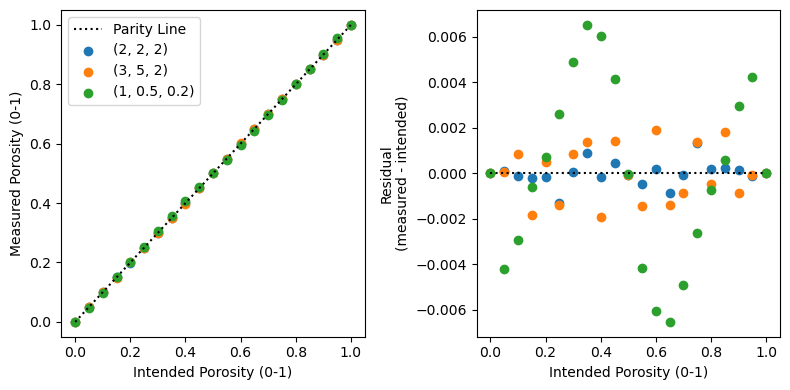

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot([0,1], [0,1], "k:", label="Parity Line")
ax[1].plot([0,1], [0,0], "k:", label="Parity Line")
for (periods, porosity) in zip(gyroid_types, porosities):
    ax[0].scatter(pore_fractions, porosity, label=periods)
    ax[1].scatter(pore_fractions, porosity-pore_fractions, label=periods)
ax[0].legend()

ax[0].set_xlabel("Intended Porosity (0-1)")
ax[0].set_ylabel("Measured Porosity (0-1)")
ax[1].set_xlabel("Intended Porosity (0-1)")
ax[1].set_ylabel("Residual\n(measured - intended)")

plt.tight_layout()
plt.show()

---
## Make a 1" cube with diamond structure

In [1]:
from spartantpms.tpms import diamond_function
from sdf import box
import numpy as np
import matplotlib.pyplot as plt

Make the signed distance function representation of the structure

In [2]:
# inputs
xmax, ymax, zmax = 25.4, 25.4, 25.4 #mm
nx, ny, nz = 2, 2, 2 #tpms periods in each dimension
pore_fraction = 0.3
step_size = 0.15

# generate structure
infill = diamond_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= pore_fraction
)
cube = box((xmax, ymax, zmax))

f = cube & infill #boolean intersection powered by sdf

Plot (note this is very slow in matplotlib -- keep `mesh_ct` low to avoid long rendering times)

In [3]:
from spartantpms.tpms.utils import to_voxels

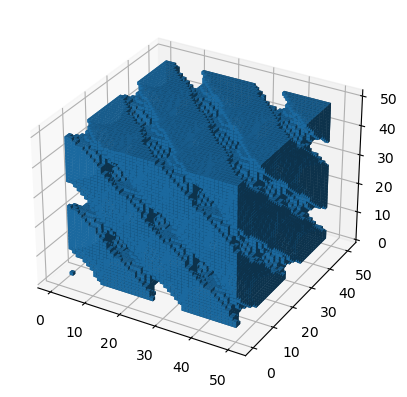

In [4]:
voxels = to_voxels(f, mesh_ct=51) #note: rendering gets very slow with higher `mesh_ct`. Default 51

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.voxels(voxels)
plt.show()

Change the periodicity in each dimension

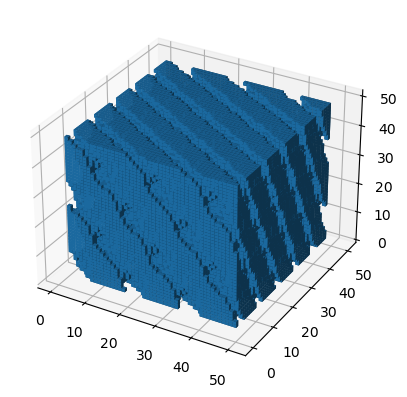

In [5]:
# inputs
xmax, ymax, zmax = 25.4, 25.4, 25.4 #mm
nx, ny, nz = 3, 5, 2 #tpms periods in each dimension
pore_fraction = 0.3
step_size = 0.15

# generate structure
infill = diamond_function(
    lambda_x = xmax/nx,
    lambda_y = ymax/ny,
    lambda_z = xmax / nz,
    porosity= pore_fraction
)
cube = box((xmax, ymax, zmax))

f = cube & infill #boolean intersection powered by sdf

voxels = to_voxels(f, mesh_ct=51) #note: rendering gets very slow with higher `mesh_ct`. Default 51

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.voxels(voxels)
plt.show()

Confirm the pore_fraction is accurate

In [6]:
from spartantpms.tpms.utils import get_porosity

In [7]:
diamond_types = [
    (2,2,2),
    (3,5,2),
    (1,0.5,0.2)
]

pore_fractions = np.linspace(0, 1, 21)
porosities = [[], [], []]
for i, (nx, ny, nz) in enumerate(diamond_types):
    for pf in pore_fractions:
        infill = diamond_function(
            lambda_x = xmax/nx,
            lambda_y = ymax/ny,
            lambda_z = xmax / nz,
            porosity= pf
        )
        cube = box((xmax, ymax, zmax))
        f = cube & infill #boolean intersection powered by sdf
        
        porosities[i].append(
            get_porosity(
                f,
                mesh_ct = 101,
                bounds = (
                    (-xmax/2, -ymax/2, -zmax/2),
                    (xmax/2, ymax/2, zmax/2)
                ) #structure is centered at (0,0,0)
        ))

We see a maximum ~1% error in porosity using our diamond functions. This could be an artifact from the relatively low mesh density used to voxelate structures before computing the pore fraction...

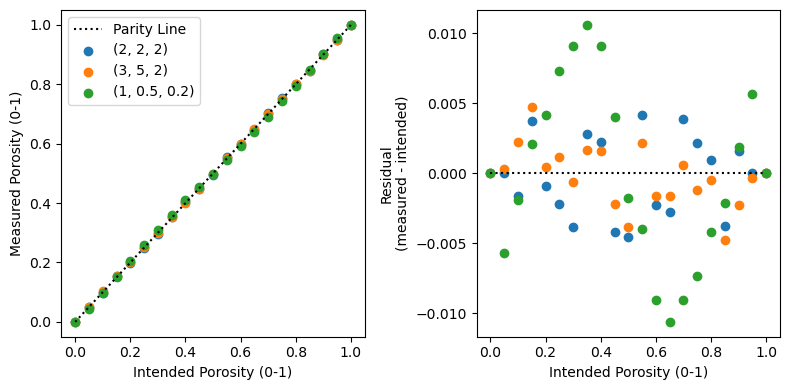

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot([0,1], [0,1], "k:", label="Parity Line")
ax[1].plot([0,1], [0,0], "k:", label="Parity Line")
for (periods, porosity) in zip(diamond_types, porosities):
    ax[0].scatter(pore_fractions, porosity, label=periods)
    ax[1].scatter(pore_fractions, porosity-pore_fractions, label=periods)
ax[0].legend()

ax[0].set_xlabel("Intended Porosity (0-1)")
ax[0].set_ylabel("Measured Porosity (0-1)")
ax[1].set_xlabel("Intended Porosity (0-1)")
ax[1].set_ylabel("Residual\n(measured - intended)")

plt.tight_layout()
plt.show()